#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns

#### References

https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data

https://www.kaggle.com/code/alexteboul/diabetes-health-indicators-dataset-notebook

https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf

We want to... predict if someone is pre-diabetic or has diabetes from certain health metrics

### Step 1: Import Data
___

In [2]:
diabetes_df = pd.read_csv('./Data/CUSTOM_diabetes_012_health_indicators_BRFSS2015.csv')
diabetes_binary_df = pd.read_csv('./Data/CUSTOM__BINARY_diabetes_012_health_indicators_BRFSS2015.csv')

#### Summarize what each column means

### Step 2: Explore & Summarize Data
___

In [3]:
diabetes_df['Diabetes_012'].value_counts()

Diabetes_012
0.0    208156
2.0     34340
1.0      4476
Name: count, dtype: int64

In [4]:
diabetes_df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,Arthritis,Depression,Race_white,Race_black,Race_AMI_AKN,Race_asian,Race_HI_PI,Race_other,Race_multi,Race_hispanic
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1,0,0,0,0,0,0,0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1,0,0,0,0,0,0,0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1,0,0,0,0,0,0,0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0,0,0,0,0,0,1,0


In [5]:
diabetes_df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,Arthritis,Depression,Race_white,Race_black,Race_AMI_AKN,Race_asian,Race_HI_PI,Race_other,Race_multi,Race_hispanic
count,246972.000000,246972.000000,246972.000000,246972.000000,246972.000000,246972.000000,246972.000000,246972.000000,246972.000000,246972.00000,...,246972.000000,246972.000000,246972.000000,246972.000000,246972.000000,246972.000000,246972.000000,246972.000000,246972.000000,246972.000000
mean,0.296212,0.429239,0.424226,0.963672,28.379330,0.441908,0.040162,0.093492,0.758240,0.63504,...,0.356478,0.199043,0.803119,0.071996,0.012876,0.020006,0.002964,0.003620,0.017962,0.067457
std,0.697539,0.494969,0.494226,0.187105,6.592675,0.496615,0.196340,0.291122,0.428151,0.48142,...,0.478960,0.399281,0.397642,0.258482,0.112740,0.140022,0.054361,0.060056,0.132812,0.250812
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.00000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


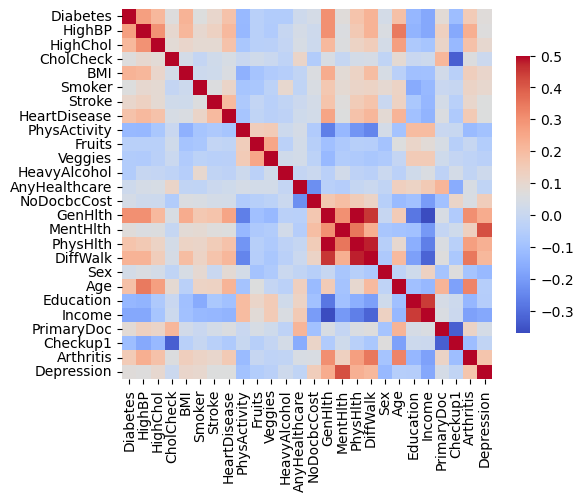

In [110]:
#make a correlation matrix of the diabetes_df
corr = diabetes_df.drop(columns=[column for column in diabetes_df.columns if column.startswith('Race')]).rename(columns={"HeartDiseaseorAttack":"HeartDisease","HvyAlcoholConsump":"HeavyAlcohol",'Diabetes_012':'Diabetes'}).corr()

#make it in seaborne
figure = sns.heatmap(corr, annot=False, cmap='coolwarm', square=True, cbar_kws={'shrink': .75}, yticklabels=True,vmax=0.5,)

<Axes: >

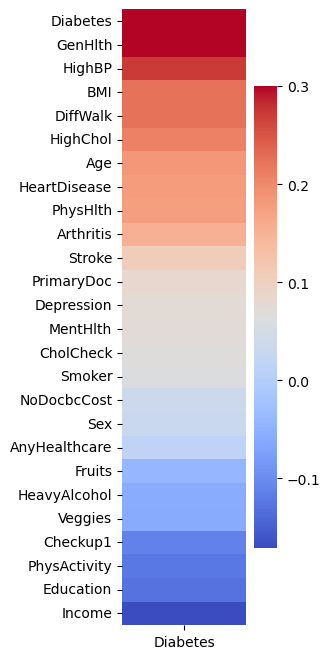

In [109]:
mini_corr = corr['Diabetes'].sort_values(ascending=False).to_frame()
plt.figure(figsize=(2, 8))
sns.heatmap(mini_corr, annot=False,square=False, cmap='coolwarm', cbar_kws={'shrink': .75}, yticklabels=True,vmax=0.3,)


### Step 3: Clean Data / Adjust For Imbalance
___

In [6]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [7]:
#define and split the multiclass data 
X_multiclass = diabetes_df.drop('Diabetes_012', axis=1)
y_multiclass = diabetes_df['Diabetes_012']
X_train_multiclass, X_test_multiclass, y_train_multiclass, y_test_multiclass = train_test_split(X_multiclass, y_multiclass, random_state=0)
#define and split the binary data
X_binary = diabetes_binary_df.drop('Diabetes_012', axis=1)
y_binary = diabetes_binary_df['Diabetes_012']
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X_binary, y_binary, random_state=0)

In [8]:
#oversample the minority class
ros_multiclass = RandomOverSampler(random_state=0)
X_oversampled_multiclass, y_oversampled_multiclass = ros_multiclass.fit_resample(X_train_multiclass, y_train_multiclass)

ros_binary = RandomOverSampler(random_state=0)
X_oversampled_binary, y_oversampled_binary = ros_binary.fit_resample(X_train_binary, y_train_binary)

In [9]:
#undersample the majority class
rus_multiclass = RandomUnderSampler(random_state=0)
X_undersampled_multiclass, y_undersampled_multiclass = rus_multiclass.fit_resample(X_train_multiclass, y_train_multiclass)

rus_binary = RandomUnderSampler(random_state=0) 
X_undersampled_binary, y_undersampled_binary = rus_binary.fit_resample(X_train_binary, y_train_binary)

In [10]:
y_oversampled_binary.count()

312132

### Step 4: Prepare for Modeling
Split, Scale, etc.
___

#### Imports

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA    

#### Scale the Split Data to Prepare it for PCA

In [12]:
#use StandardScaler to scale the data
scaler_multiclass = StandardScaler().fit(X_oversampled_multiclass)
X_oversampled_multiclass_scaled = scaler_multiclass.transform(X_oversampled_multiclass)
X_undersampled_multiclass_scaled = scaler_multiclass.transform(X_undersampled_multiclass)
X_test_multiclass_scaled = scaler_multiclass.transform(X_test_multiclass)

#scale the binary data
scaler_binary = StandardScaler().fit(X_oversampled_binary)
X_oversampled_binary_scaled = scaler_binary.transform(X_oversampled_binary)
X_undersampled_binary_scaled = scaler_binary.transform(X_undersampled_binary)
X_test_binary_scaled = scaler_binary.transform(X_test_binary)

#### Perform PCA maintaining 90% variance

In [13]:
#reduce dimensionality of the scaled data with pca
pca = PCA(n_components=0.90, random_state=0)
X_pca_oversampled_multiclass_scaled = pca.fit_transform(X_oversampled_multiclass_scaled)
X_pca_undersampled_multiclass_scaled = pca.transform(X_undersampled_multiclass_scaled)
X_pca_test_multiclass_scaled = pca.transform(X_test_multiclass)


pca_binary = PCA(n_components=0.90, random_state=0)
X_pca_oversampled_binary_scaled = pca_binary.fit_transform(X_oversampled_binary_scaled)
X_pca_undersampled_binary_scaled = pca_binary.transform(X_undersampled_binary_scaled)
X_pca_test_binary_scaled = pca_binary.transform(X_test_binary_scaled)

c:\Users\matt.dipinto\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [14]:
pca.explained_variance_ratio_

array([0.1174039 , 0.07192064, 0.05519846, 0.04516867, 0.03896104,
       0.03732106, 0.03470428, 0.03346876, 0.03321441, 0.03187054,
       0.03098369, 0.03066635, 0.03044568, 0.03027576, 0.02903621,
       0.02776878, 0.02696034, 0.02470007, 0.02416049, 0.02363269,
       0.02308903, 0.02285053, 0.02179342, 0.02111564, 0.02072047,
       0.01996722])

In [15]:
components = pca.components_

feature_names = list(X_multiclass.columns)
components_df = pd.DataFrame(components, columns=feature_names, index=[f'PC{i+1}' for i in range(components.shape[0])])

components_df


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,Arthritis,Depression,Race_white,Race_black,Race_AMI_AKN,Race_asian,Race_HI_PI,Race_other,Race_multi,Race_hispanic
PC1,0.210146,0.166566,0.041250,0.166284,0.120284,0.146712,0.178724,-0.205994,-0.081892,-0.110781,...,0.255273,0.225950,-0.090270,0.070335,0.033075,-0.051068,0.004783,0.009299,0.026285,0.062340
PC2,-0.211402,-0.182129,-0.192997,0.009122,-0.079742,-0.070679,-0.148214,-0.021821,-0.081894,-0.077566,...,-0.184462,0.058854,-0.367833,0.144064,0.096596,0.071656,0.043457,0.041929,0.070371,0.280969
PC3,-0.155799,-0.036751,-0.247766,-0.011689,0.147121,0.002948,0.022678,-0.014593,-0.071781,0.034873,...,0.029280,0.229071,0.532353,-0.378104,-0.080355,-0.146309,-0.043990,-0.025800,-0.088509,-0.254420
PC4,0.173479,0.104213,-0.191119,-0.021727,0.226342,0.099213,0.200895,-0.122273,-0.297970,-0.293533,...,-0.087340,-0.340475,0.037389,-0.008802,0.038051,-0.061445,0.020698,-0.019513,-0.034979,-0.015459
PC5,-0.021775,0.015456,-0.141983,-0.360195,0.047386,0.221066,0.250159,0.212281,0.493060,0.415265,...,0.089656,-0.120472,-0.042670,-0.159340,0.018042,0.050056,-0.012977,0.036570,0.038207,0.170673
PC6,0.063902,0.139718,-0.012195,-0.060610,0.182790,0.222575,0.241418,0.138521,-0.038291,0.050299,...,-0.056187,0.085357,-0.253337,0.123834,0.101091,0.384263,0.061206,0.120755,0.315229,-0.197795
PC7,0.097669,-0.029286,-0.310300,0.121918,-0.196432,0.060959,-0.074867,-0.028318,0.135869,-0.055165,...,0.170759,-0.099098,0.005936,0.493096,0.034829,0.022100,-0.020955,-0.009959,-0.054140,-0.515921
PC8,0.343710,0.323604,0.091413,0.401084,-0.048152,-0.143636,0.013077,0.169037,0.137325,0.271561,...,-0.021816,0.017617,0.030322,0.135998,-0.285679,-0.214162,0.083342,-0.039309,-0.116646,0.116774
PC9,0.016292,-0.030659,0.005208,-0.066352,0.435345,-0.110775,-0.148381,0.125767,0.054820,0.094759,...,0.078409,0.078709,-0.059580,0.259348,0.202096,-0.367582,-0.023442,-0.027877,0.221795,-0.177311
PC10,0.046353,-0.144800,-0.118290,0.420689,-0.085367,-0.158992,0.006542,-0.179382,0.124071,0.237244,...,0.056794,-0.124655,-0.061691,-0.229351,0.339859,-0.269012,-0.073404,0.165544,0.397240,0.089850


c:\Users\matt.dipinto\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\matt.dipinto\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\matt.dipinto\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


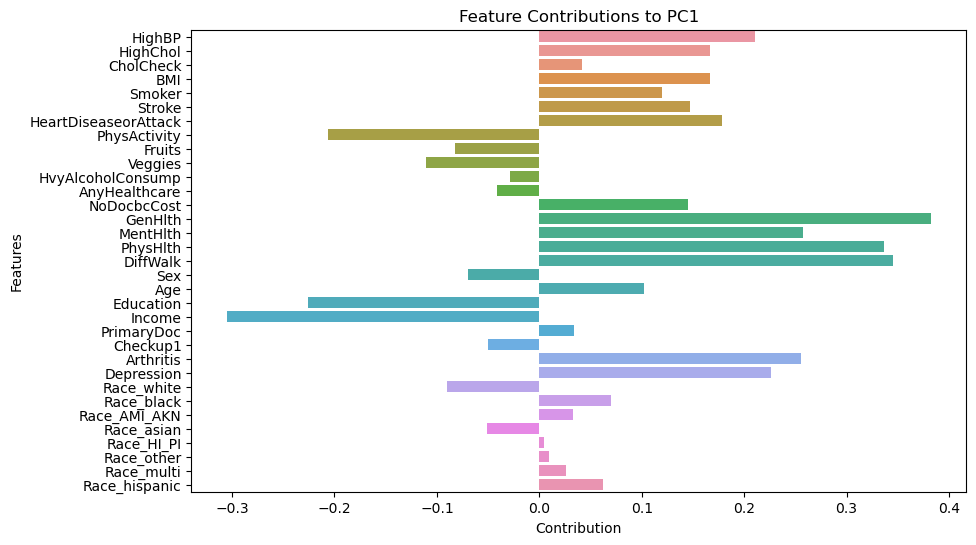

In [16]:
component = 'PC1'

plt.figure(figsize=(10, 6))
sns.barplot(x=components_df.loc[component], y=components_df.columns)
plt.title(f'Feature Contributions to {component}')
plt.xlabel('Contribution')
plt.ylabel('Features')
plt.show()

### Step 5: Test Various models with default params
___

#### Imports

In [17]:
#Import unsupervised models
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KNeighborsClassifier
#Import supervised models
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score

#### Logistic Regression Initial Testing

In [18]:
#logistic regression on oversampled and undersampled multiclass data
lr_ros = LogisticRegression(max_iter=10000).fit(X_oversampled_multiclass, y_oversampled_multiclass)
lr_rus = LogisticRegression(max_iter=10000).fit(X_undersampled_multiclass, y_undersampled_multiclass)
#logistic regression on oversampled and undersampled binary data
lr_ros_binary = LogisticRegression(max_iter=10000).fit(X_oversampled_binary, y_oversampled_binary)
lr_rus_binary = LogisticRegression(max_iter=10000).fit(X_undersampled_binary, y_undersampled_binary) 
#logistic regression on binary data after pca
lr_ros_pca_binary = LogisticRegression(max_iter=10000).fit(X_pca_oversampled_binary_scaled, y_oversampled_binary)
lr_rus_pca_binary = LogisticRegression(max_iter=10000).fit(X_pca_undersampled_binary_scaled, y_undersampled_binary)

In [19]:
#multiclass train and test accuracy (oversampled)
print("Random Oversampling logistic regression model produced the following:\n" + classification_report(y_oversampled_multiclass, lr_ros.predict(X_oversampled_multiclass)))
print("Random Oversampling on the test data produced the following:\n" + classification_report(y_test_multiclass, lr_ros.predict(X_test_multiclass)))

Random Oversampling logistic regression model produced the following:
              precision    recall  f1-score   support

         0.0       0.61      0.66      0.63    156066
         1.0       0.45      0.35      0.39    156066
         2.0       0.51      0.59      0.55    156066

    accuracy                           0.53    468198
   macro avg       0.52      0.53      0.52    468198
weighted avg       0.52      0.53      0.52    468198

Random Oversampling on the test data produced the following:
              precision    recall  f1-score   support

         0.0       0.95      0.66      0.78     52090
         1.0       0.03      0.34      0.06      1091
         2.0       0.35      0.58      0.44      8562

    accuracy                           0.65     61743
   macro avg       0.45      0.53      0.43     61743
weighted avg       0.85      0.65      0.72     61743



In [20]:
#multiclass train and test accuracy (undersampled)
print("Random Undersampling logistic regression model produced the following:\n" + classification_report(y_undersampled_multiclass, lr_rus.predict(X_undersampled_multiclass)))
print("Random undersampling on the test data produced the following:\n" + classification_report(y_test_multiclass, lr_rus.predict(X_test_multiclass)))

Random Undersampling logistic regression model produced the following:
              precision    recall  f1-score   support

         0.0       0.61      0.67      0.64      3385
         1.0       0.45      0.34      0.39      3385
         2.0       0.52      0.60      0.56      3385

    accuracy                           0.54     10155
   macro avg       0.53      0.54      0.53     10155
weighted avg       0.53      0.54      0.53     10155

Random undersampling on the test data produced the following:
              precision    recall  f1-score   support

         0.0       0.95      0.66      0.78     52090
         1.0       0.03      0.33      0.06      1091
         2.0       0.35      0.58      0.44      8562

    accuracy                           0.65     61743
   macro avg       0.45      0.53      0.43     61743
weighted avg       0.85      0.65      0.72     61743



In [43]:
merged_undersampled = pd.concat([X_test_multiclass,y_test_multiclass], axis=1)
merged_undersampled = merged_undersampled.loc[merged_undersampled['Diabetes_012'] == 1]
predicitions = lr_ros.predict(merged_undersampled.drop('Diabetes_012', axis=1))
pd.Series(predicitions).value_counts()

2.0    454
1.0    369
0.0    268
Name: count, dtype: int64

In [21]:
#binary train and test accuracy (oversampled)
print("Random Oversampling logistic regression model produced the following:\n" + classification_report(y_oversampled_binary, lr_ros_binary.predict(X_oversampled_binary)))
print("Random Oversampling on the test data produced the following:\n" + classification_report(y_test_binary, lr_ros_binary.predict(X_test_binary)))

Random Oversampling logistic regression model produced the following:
              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74    156066
         1.0       0.74      0.77      0.75    156066

    accuracy                           0.75    312132
   macro avg       0.75      0.75      0.75    312132
weighted avg       0.75      0.75      0.75    312132

Random Oversampling on the test data produced the following:
              precision    recall  f1-score   support

         0.0       0.94      0.73      0.82     52090
         1.0       0.34      0.77      0.47      9653

    accuracy                           0.73     61743
   macro avg       0.64      0.75      0.65     61743
weighted avg       0.85      0.73      0.77     61743



In [22]:
#binary train and test accuracy (undersampled)
print("Random Undersampling logistic regression model produced the following:\n" + classification_report(y_undersampled_binary, lr_rus_binary.predict(X_undersampled_binary)))
print("Random undersampling on the test data produced the following:\n" + classification_report(y_test_binary, lr_rus_binary.predict(X_test_binary)))

Random Undersampling logistic regression model produced the following:
              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74     29163
         1.0       0.74      0.77      0.75     29163

    accuracy                           0.75     58326
   macro avg       0.75      0.75      0.75     58326
weighted avg       0.75      0.75      0.75     58326

Random undersampling on the test data produced the following:
              precision    recall  f1-score   support

         0.0       0.94      0.73      0.82     52090
         1.0       0.34      0.77      0.47      9653

    accuracy                           0.73     61743
   macro avg       0.64      0.75      0.65     61743
weighted avg       0.85      0.73      0.77     61743



In [23]:
#binary train and test accuracy (oversampled pca)
print("Random Oversampling logistic regression model produced the following:\n" + classification_report(y_oversampled_binary, lr_ros_pca_binary.predict(X_pca_oversampled_binary_scaled)))
print("Random Oversampling on the test data produced the following:\n" + classification_report(y_test_binary, lr_ros_pca_binary.predict(X_pca_test_binary_scaled)))

Random Oversampling logistic regression model produced the following:
              precision    recall  f1-score   support

         0.0       0.75      0.72      0.73    156066
         1.0       0.73      0.76      0.74    156066

    accuracy                           0.74    312132
   macro avg       0.74      0.74      0.74    312132
weighted avg       0.74      0.74      0.74    312132

Random Oversampling on the test data produced the following:
              precision    recall  f1-score   support

         0.0       0.94      0.72      0.82     52090
         1.0       0.34      0.75      0.46      9653

    accuracy                           0.73     61743
   macro avg       0.64      0.74      0.64     61743
weighted avg       0.85      0.73      0.76     61743



In [24]:
#binary train and test accuracy (undersampled pca)
print("Random Undersampling logistic regression model produced the following:\n" + classification_report(y_undersampled_binary, lr_rus_pca_binary.predict(X_pca_undersampled_binary_scaled)))
print("Random undersampling on the test data produced the following:\n" + classification_report(y_test_binary, lr_rus_pca_binary.predict(X_pca_test_binary_scaled)))

Random Undersampling logistic regression model produced the following:
              precision    recall  f1-score   support

         0.0       0.75      0.73      0.74     29163
         1.0       0.73      0.76      0.75     29163

    accuracy                           0.74     58326
   macro avg       0.74      0.74      0.74     58326
weighted avg       0.74      0.74      0.74     58326

Random undersampling on the test data produced the following:
              precision    recall  f1-score   support

         0.0       0.94      0.72      0.82     52090
         1.0       0.34      0.76      0.46      9653

    accuracy                           0.73     61743
   macro avg       0.64      0.74      0.64     61743
weighted avg       0.85      0.73      0.76     61743



___

### Generic Model setup for trying different models
* SVC: sucked, didn't work, took too long to train >15 hours - possible to train it on a GPU, maybe?

In [25]:
# model_oversampled = RandomForestClassifier().fit(X_oversampled_multiclass, y_oversampled_multiclass)
# model_undersampled = RandomForestClassifier().fit(X_undersampled_multiclass, y_undersampled_multiclass)
model_oversampled_binary = RandomForestClassifier(max_depth=10).fit(X_oversampled_binary, y_oversampled_binary)
model_undersampled_binary = RandomForestClassifier(max_depth=10).fit(X_undersampled_binary, y_undersampled_binary)

# model_oversampled_pca = RandomForestClassifier().fit(X_pca_oversampled_multiclass_scaled, y_oversampled_multiclass)
# model_undersampled_pca = RandomForestClassifier().fit(X_pca_undersampled_multiclass_scaled, y_undersampled_multiclass)
model_oversampled_binary_pca = RandomForestClassifier(max_depth=10).fit(X_pca_oversampled_binary_scaled, y_oversampled_binary)
model_undersampled_binary_pca = RandomForestClassifier(max_depth=10).fit(X_pca_undersampled_binary_scaled, y_undersampled_binary)    

# print("\n MULTICLASS DATA \n")
# print("Undersample, multiclass, training data report:\n" + classification_report(y_undersampled_multiclass, model_undersampled.predict(X_undersampled_multiclass)))
# print("Undersample, multiclass, test data report:\n" + classification_report(y_test_multiclass, model_undersampled.predict(X_test_multiclass)))
# print("Oversample, multiclass, training data:\n" + classification_report(y_oversampled_multiclass, model_oversampled.predict(X_oversampled_multiclass)))
# print("Oversample, multiclass, test data:\n" + classification_report(y_test_multiclass, model_oversampled.predict(X_test_multiclass)))

print("\n BINARY DATA \n")
print("Undersample, binary, training data:\n" + classification_report(y_undersampled_binary, model_undersampled_binary.predict(X_undersampled_binary)))
print("Undersample, binary, testing data:\n" + classification_report(y_test_binary, model_undersampled_binary.predict(X_test_binary)))
print("Oversample, binary, training data:\n" + classification_report(y_oversampled_binary, model_oversampled_binary.predict(X_oversampled_binary)))
print("Oversample, binary, test data:\n" + classification_report(y_test_binary, model_oversampled_binary.predict(X_test_binary)))

# print('MULTICLASS PCA DATA')
# print("Undersample, multiclass, training data report:\n" + classification_report(y_undersampled_multiclass, model_undersampled_pca.predict(X_pca_undersampled_multiclass_scaled)))
# print("Undersample, multiclass, test data report:\n" + classification_report(y_test_multiclass, model_undersampled_pca.predict(X_pca_test_multiclass_scaled)))
# print("Oversample, multiclass, training data:\n" + classification_report(y_oversampled_multiclass, model_oversampled_pca.predict(X_pca_oversampled_multiclass_scaled)))
# print("Oversample, multiclass, test data:\n" + classification_report(y_test_multiclass, model_oversampled_pca.predict(X_pca_test_multiclass_scaled)))

print('BINARY PCA DATA')
print("Undersample, binary, training data:\n" + classification_report(y_undersampled_binary, model_undersampled_binary_pca.predict(X_pca_undersampled_binary_scaled)))
print("Undersample, binary, testing data:\n" + classification_report(y_test_binary, model_undersampled_binary_pca.predict(X_pca_test_binary_scaled)))
print("Oversample, binary, pca, training data:\n" + classification_report(y_oversampled_binary, model_oversampled_binary_pca.predict(X_pca_oversampled_binary_scaled)))
print("Oversample, binary, pca, test data:\n" + classification_report(y_test_binary, model_oversampled_binary_pca.predict(X_pca_test_binary_scaled)))


 BINARY DATA 

Undersample, binary, training data:
              precision    recall  f1-score   support

         0.0       0.79      0.74      0.76     29163
         1.0       0.75      0.81      0.78     29163

    accuracy                           0.77     58326
   macro avg       0.77      0.77      0.77     58326
weighted avg       0.77      0.77      0.77     58326

Undersample, binary, testing data:
              precision    recall  f1-score   support

         0.0       0.95      0.71      0.81     52090
         1.0       0.34      0.79      0.47      9653

    accuracy                           0.72     61743
   macro avg       0.64      0.75      0.64     61743
weighted avg       0.85      0.72      0.76     61743

Oversample, binary, training data:
              precision    recall  f1-score   support

         0.0       0.79      0.73      0.76    156066
         1.0       0.75      0.80      0.77    156066

    accuracy                           0.77    312132
   mac

### Step 6: Select Preferred Models & Optimize
___

#### Imports

In [26]:
from sklearn.model_selection import GridSearchCV

#### Random Forest Classifier 

In [27]:
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200], 
    'max_depth': [10, 15, 20, 30], 
    'min_samples_split': [2, 4, 6], 
    'min_samples_leaf': [1, 2, 4] 
}

In [28]:
model_cv = RandomForestClassifier(random_state=0)
grid_search = GridSearchCV(model_cv, param_grid_rf, cv=5, n_jobs=-1, verbose=3)

In [29]:
grid_search.fit(X_oversampled_binary, y_oversampled_binary)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


KeyboardInterrupt: 

In [ ]:
grid_search.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [ ]:
best_RF = grid_search.best_estimator_

In [ ]:
#classification report for the best model
print("Oversample, binary, testing data:\n" + classification_report(y_test_binary, best_RF.predict(X_test_binary)))

Oversample, binary, testing data:
              precision    recall  f1-score   support

         0.0       0.89      0.92      0.90     52090
         1.0       0.46      0.36      0.40      9653

    accuracy                           0.83     61743
   macro avg       0.67      0.64      0.65     61743
weighted avg       0.82      0.83      0.82     61743



#### Logistic Regression

In [ ]:
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Type of regularization
    'solver': ['liblinear', 'saga']  # Algorithms that support both l1 and l2 penalties
}
model_cv_lr = LogisticRegression(random_state=0)
grid_search_lr = GridSearchCV(model_cv_lr, param_grid_lr, cv=5, n_jobs=-1, verbose=3)

In [ ]:
grid_search_lr.fit(X_oversampled_binary, y_oversampled_binary)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=3)

In [ ]:
grid_search_lr.best_params_

{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

In [ ]:
best_LR = grid_search_lr.best_estimator_

In [ ]:
print("Oversample, binary, testing data:\n" + classification_report(y_test_binary, best_LR.predict(X_test_binary)))

Oversample, binary, testing data:
              precision    recall  f1-score   support

         0.0       0.94      0.73      0.82     52090
         1.0       0.34      0.77      0.47      9653

    accuracy                           0.73     61743
   macro avg       0.64      0.75      0.65     61743
weighted avg       0.85      0.73      0.77     61743



___

#### Boosted Trees

In [50]:
#train a gradientboostingclassifier on the undersampled binary data
from sklearn.ensemble import GradientBoostingClassifier


param_grid_gbc = {
    'n_estimators': [100, 300],
    'learning_rate': [0.01, 0.2],
    'max_depth': [5, 20],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', None],
    'subsample': [0.8, 1.0]
}




model_cv_gbc = GradientBoostingClassifier(random_state=0)
grid_search_gbc = GridSearchCV(model_cv_gbc, param_grid_gbc, cv=5, n_jobs=-1, verbose=3)

grid_search_gbc.fit(X_undersampled_binary, y_undersampled_binary)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.2], 'max_depth': [5, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 300], 'subsample': [0.8, 1.0]},
             verbose=3)

In [51]:
grid_search_gbc.best_params_

{'learning_rate': 0.2,
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100,
 'subsample': 1.0}

In [52]:
Best_GBC = grid_search_gbc.best_estimator_
print("Undersample, binary, testing data:\n" + classification_report(y_test_binary, Best_GBC.predict(X_test_binary)))

In [63]:
param_grid_gbc_2 = {'learning_rate': [0.1, 0.2],
 'max_depth': [3, 5],
 'max_features': ['sqrt'],
 'min_samples_leaf': [2, 4],
 'min_samples_split': [2],
 'n_estimators': [50, 100, 150],
 'subsample': [0.85, 0.9, 0.95]}

model_cv_gbc_2 = GradientBoostingClassifier(random_state=0)
grid_search_gbc_2 = GridSearchCV(model_cv_gbc_2, param_grid_gbc_2, cv=3, n_jobs=1, verbose=3, scoring='recall')
grid_search_gbc_2.fit(X_undersampled_binary, y_undersampled_binary)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV 1/3] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50, subsample=0.85;, score=0.774 total time=   0.6s
[CV 2/3] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50, subsample=0.85;, score=0.777 total time=   0.6s
[CV 3/3] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50, subsample=0.85;, score=0.784 total time=   0.4s
[CV 1/3] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50, subsample=0.9;, score=0.775 total time=   0.4s
[CV 2/3] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50, subsample=0.9;, score=0.776 total time=   0.4s
[CV 3/3] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_sa

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=1,
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [3, 5],
                         'max_features': ['sqrt'], 'min_samples_leaf': [2, 4],
                         'min_samples_split': [2],
                         'n_estimators': [50, 100, 150],
                         'subsample': [0.85, 0.9, 0.95]},
             scoring='recall', verbose=3)

In [64]:
grid_search_gbc.best_params_

{'learning_rate': 0.2,
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100,
 'subsample': 0.9}

In [65]:
Best_GBC_2 = grid_search_gbc.best_estimator_
print("Undersample, binary, testing data:\n" + classification_report(y_test_binary, Best_GBC.predict(X_test_binary)))

Undersample, binary, testing data:
              precision    recall  f1-score   support

         0.0       0.95      0.71      0.81     52090
         1.0       0.34      0.79      0.47      9653

    accuracy                           0.73     61743
   macro avg       0.64      0.75      0.64     61743
weighted avg       0.85      0.73      0.76     61743



#### Step X: PCA, confidence, various accuracy metrics, (random forest impacts), feature correlation, unsupervised / supervised approach

Separate Parallel tasks:
* pca
* correlation
* clustering